In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

## Introduction

### The Supervised Learning Problem

Essentially problems where the data is labeled, the is it includes the outcome measurement. 

Our data contains;
+ the **outcome measurement** $Y$ (dependent variable, response, target) 
+ the vectory $p$ of **predictor measurements** $X$ (inputs, regressors, covariates, features, independent variables)

This data is often called the training data $(x_1,y_1),\dots(x_N,y_N)$. Each pair is an **observation** (examples, instances) of the measurements.

**Regression** and **classification** are two different types of supervised learning problems;

+ In regression, $y$ is quantitative.
+ In classification $y$ takes values in a finite ordered set.

There are generally two goals, **prediction** and **inference**;
+ in prediction we want to predict the outcome measurement for new and unseen predictor measurements, we may not care about the underlying relationship between variables
+ in inference, we are looking to describe and model the true underlying relatipnship between the predictors and outcomes.

On the basis of the training data we want to;

+ Accurately predict unseen (new) test data (cases).
+ Understand which inputs affect the outcome, and how.
+ Asses the quality of our predictions and inferences.

### The Unsupervised Learning Problem

Problems where our data is not labeled, that is it does not include the outcome variable.

Our data contains;
+ a set of predictors (features) $X$ measured on a set of samples.

On the basis of the training data we want to;
+ find groups of samples that behave similarly
+ find features that behave similary
+ find linear combinations of features with the more variation

The fuzziness of these objectives makes it more difficult to assess the quality of our models.

## Statistical Learning

What is it? 

In [2]:
advertising = pd.read_csv('data/Advertising.csv')

In [3]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


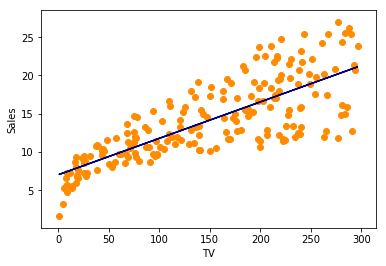

In [4]:
lm_original = np.polyfit(advertising.TV, advertising.Sales, 1)
r_y = [i*lm_original[0] + lm_original[1] for i in advertising.TV]
plt.plot(advertising.TV, r_y, c='navy')
plt.scatter(advertising.TV, advertising.Sales, c='darkorange')
plt.xlabel('TV')
plt.ylabel('Sales');

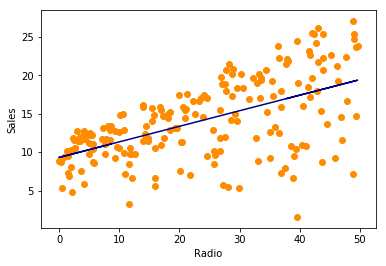

In [5]:
lm_original = np.polyfit(advertising.Radio, advertising.Sales, 1)
r_y = [i*lm_original[0] + lm_original[1] for i in advertising.Radio]
plt.plot(advertising.Radio, r_y, c='navy')
plt.scatter(advertising.Radio, advertising.Sales, c='darkorange')
plt.xlabel('Radio')
plt.ylabel('Sales');

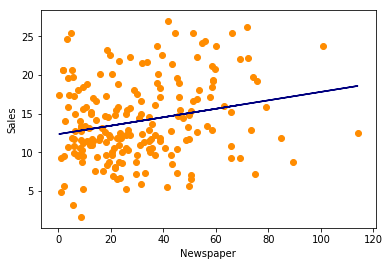

In [6]:
lm_original = np.polyfit(advertising.Newspaper, advertising.Sales, 1)
r_y = [i*lm_original[0] + lm_original[1] for i in advertising.Newspaper]
plt.plot(advertising.Newspaper, r_y, c='navy')
plt.scatter(advertising.Newspaper, advertising.Sales, c='darkorange')
plt.xlabel('Newspaper')
plt.ylabel('Sales');

Above we fit a linear regression line separetely to the *TV*, *radio* and *newspaper* data to predict sales.

Can we predict Sales using these three?

Perhaps we can do better using a model like;

$$\text{Sales} \approx f(\text{TV, Radio, Newspaper})$$

*Sales* is a **response** or **target** variable that we wish to predict, we refer to it as $Y$.

*TV* is a **feature**, or **input**, or **predictor** variable, we will call it $X_1$. *Radio* and *Newspaper* are also feature variables and we can label them $X_2$ and $X_3$.

There features can be refered to collectively as the **input vector**;

$$X = \begin{pmatrix}X_1\\ X_2\\ X_3\end{pmatrix}$$

So, our model is;

$$Y = f(X) + \epsilon$$

where $\epsilon$ captures measurement errors and other disrepancies.

**What can we do with $f(X)$?**

+ make predictions of $Y$ at new points $X = x$.
+ understand which components of $X = (X_1,X_2,\dots,X_p)$ are important in explaining $Y$, and which are irrelevant. 
+ depending on the complexity of $f$, we may be able to understand how each component $X_j$ of $X$ affects $Y$.

**The ideal $f(X)$**

What is a good value for $f(X)$ at any selected value of $X$, say $X = x_i$? 

There can be many $Y$ values at $X = x_i$. A good value is;

$$f(x_i) = E(Y|X=x_i)$$

where $E(Y|X=x_i)$ is the **expected value** (average) of $Y$ given $X=x_i$.

This ideal $f(x) = E(Y|X = x)$ is called the **regression function**.

In vector notation;

$$f(x)=f(x_1,x_2,x_3)=E(Y|X_1=x_1, X_2=x_2,X_3=x_3)$$

for vector $X$.

One way to find the **optimal** predictor of $Y$ is to minimize the **mean squared error**.

$$MSE = E[(Y-g(X))^2|X=x]$$
over all functions $g$ at all points $X=x$.

$\epsilon=Y-f(x)$ is the **irreducible error** where even if we know $f(x)$, we would still have an error in the prediction. So our models are made up of *reducible error* + *irreducible error*.

For any estimate $\hat{f}(x)$ of $f(x)$;

$$E[(Y-\hat{f}(X)))^2|X=x] = [f(x)-\hat{f}(x)]^2 + Var(\epsilon)$$

### Parametric and structured models

**Parametric models** have a set structure, we are making assumptions about the relationship by choosing an explicit model.

The most common example of a parametric model is the **linear model**;

$$f(X) = \beta_0 + \beta_1X_1 + \beta_2X_2+\dots+\beta_pX_p$$

Although it is *almost never correct*, a linear model often serves as a good and interpretable approximation to the unknown true function $f(X)$.

While we can find models that will make better predictions than the linear model, we will see that there are trade-offs. 
+ Prediction accuracy versus interpretability.
    + Linear models are easy to interpret; thin-plate splines are not.
+ Good fit versus over-fit or under-fit.
    + How do we know when the fit is just right?
+ Parsimony versus black-box.
    + We often prefer a simpler model involving fewer variables over a black-box predictor involving them all.

### Assessing Model Accuracy

To asses a model ($\hat{f}(X)$), we may want to compute the MSE on the training data,however this will be biased toward models that overfit the data.

Instead, if possible, we want to compute the MSE on a set of testing data that the model has not seen.

When we add feature to a model, it becomes more flexible, which means it can fit the training data better, this will result in a decrease of MSE, but can lead to overfitting. Overfitting is when the model starts fitting random noise in the data instead of underlying pattern.

### Bias-Variance Trade-off

Typically as the flexibility of $\hat{f}$ increases, its variance increases,
and its bias decreases. So choosing the flexibility based on average test error amounts to a bias-variance trade-off.

### Classification Error

So far we have focused on regression problems, many problems have categories as their output, these are classification problems. A simple was to assess a classification model is to find the percentage of observations you classified correctly, this is the **misclassification error rate**.

The Bayes classified has the smallest error in the population.

### K-Nearest Neighbor

KNN predit the label of an observation by finding the most likely label of the $k$ nearest observations. So, for each observation we;

+ find each observations closest neighbors using a distance function (often euclidean)
+ each neighbor gets a "vote" for the oberservations label
+ highest vote class is the prediction.

## Exercises

### Conceptual
   
#### 1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

**(a)** The sample size $n$ is extremely large, and the number of predictors $p$ is small.

> Better, the number of observations should keep the model from fitting the noise, while the smaller $p$ mean an inflexible model has less to work with.

**(b)** The number of predictors $p$ is extremely large, and the number of observations $n$ is small.

> Worse, a low number of obervations can lead to overfitting.

**(c)** The relationship between the predictors and response is highly non-linear.

> Better, flexible methods tend to fit complicated relationships better.

**(d)** The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high.

> Worse, this means the data is very noisy and a flexible model might follow the noise and overfit the data.

#### 2. Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide $n$ and $p$.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

> Regression, inference, 500, 3
    
**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

> Classification, prediction, 20, 13

**(c)** We are interest in predicting the % change in the USD/Euro exchange rate in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the USD/Euro, the % change in the US market, the % change in the British market, and the % change in the German market.

> Regression, prediction, 52, 3

#### 3. We now revisit the bias-variance decomposition.

**(a)** Provide a sketch of typical (squared) bias, variance, training error, test error, and Bayes (or irreducible) error curves, on a single plot, as we go from less flexible statistical learning methods towards more flexible approaches. The x-axis should represent the amount of flexibility in the method, and the y-axis should represent the values for each curve. There should be five curves. Make sure to label each one.

> See plot below.

**(b)** Explain why each of the five curves has the shape displayed in part (a).

> Variance increases because the model starts to fit more noise.

> Bias decreases because we are assuming less about the underlying relationship as we increase model flexibility.

> Training error will reduce as the model starts closely fit and then over fit the data.

> Test Error could decrease until a point where it starts to increase as the model now over fits the training data and doesn't fit the test data well.

> Irreducible error is the random noise that cannot be reduced (obviously).

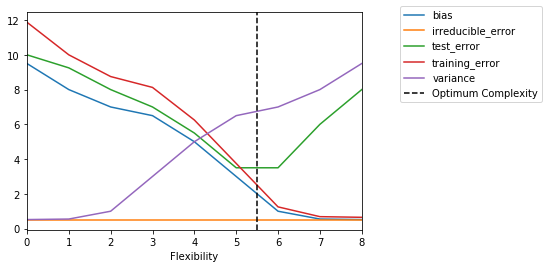

In [7]:
variance = [0.52, 0.55, 1, 3, 5, 6.5, 7, 8, 9.5] #goes up as model if more flexible
bias = variance[::-1] #goes down as model is more flexible
training_error = np.array(bias) * 1.25 #will reduce as model starts to overfit
test_error = [10, 9.25, 8, 7, 5.5, 3.5, 3.5, 6, 8] #reduces to optimal point then increases
irreducible_error = [0.5] * 9 #stays the same

df = pd.DataFrame({'bias': bias, 'variance':variance, 'training_error': training_error,
                   'test_error':test_error, 'irreducible_error': irreducible_error})

df.plot()
plt.axvline(5.5, c='black', ls ='dashed', label='Optimum Complexity')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xlabel('Flexibility');

#### 4. You will now think of some real-life applications for statistical learning.

**(a)** Describe three real-life applications in which classification might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.

**(b)** Describe three real-life applications in which regression might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.

**(c)** Describe three real-life applications in which cluster analysis might be useful.

#### 5. What are the advantages and disadvantages of a very flexible (versus a less flexible) approach for regression or classification? Under what circumstances might a more flexible approach be preferred to a less flexible approach? When might a less flexible approach be preferred?

> The advantage of a flexible model is it's ability to model more complex underlying relationships because we are making less assumptions about the relationships of the data. They can be prone to overfitting though, so when we have very little or very noisy data, a less flexible approach could be prefered. 

#### 6. Describe the differences between a parametric and a non-parametric statistical learning approach. What are the advantages of a parametric approach to regression or classification (as opposed to a  nonparametric approach)? What are its disadvantages?

> Parametric models make assumptions about the data, we select a form for the function and learn the coefficients for the function from the training data. Nonparametric models make no assumptions and therefore are very flexible and can provide better performance. However, using a parametric model simplifies the process, works faster,  and makes the model easier to interpert. Often this will have a worse fit (but maybe not by enough to matter). 

#### 7. The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

|Obs.| $X_1$| $X_2$| $X_3$| $Y$|
|--|--|--|--|--|
|1| 0 |3| 0| Red|
|2 |2| 0 |0| Red|
|3| 0| 1| 3| Red|
|4 |0 |1 |2 |Green|
|5 | −1| 0 |1| Green|
|6| 1 |1| 1| Red|

Suppose we wish to use this data set to make a prediction for $Y$ when $X_1 = X_2 = X_3 = 0$ using $K$-nearest neighbors.

**(a)** Compute the Euclidean distance between each observation and the test point, $X_1 = X_2 = X_3 = 0$.

> See dataframe below.

**(b)** What is our prediction with $K = 1$? Why?

> The fifth observation is the closest, so our predicted label for the test point is "Green".

**(c)** What is our prediction with $K = 3$? Why?

> The 3 closest observations are five, six, and two, with 2 out of 3 having a label of "Red", therefore our predicted label for the test point is "Red".

**(d)** If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for $K$ to be large or small? Why?

> Smaller, allowing for local observations to contribute more the prediction.

In [8]:
training_data = pd.DataFrame({'X1': [0, 2, 0, 0, -1, 1],
                              'X2':[3, 0, 1, 1, 0, 1], 
                              'X3':[0, 0, 3, 2, 1, 1],
                              'Y':['R', 'R', 'R', 'G', 'G', 'R']})

test_point = [0,0,0]

In [9]:
euclidean_distance = np.linalg.norm(training_data[['X1','X2','X3']].sub(np.array(test_point)), 
                                    axis=1)

training_data = training_data.assign(Dist=euclidean_distance)

In [10]:
training_data

,X1,X2,X3,Y,Dist
0,0,3,0,R,3.000000
1,2,0,0,R,2.000000
2,0,1,3,R,3.162278
3,0,1,2,G,2.236068
4,-1,0,1,G,1.414214
5,1,1,1,R,1.732051


### Applied

#### 8. This exercise relates to the College data set, which can be found in the file College.csv. It contains a number of variables for 777 different universities and colleges in the US.

**(a)** Use the read.csv() function to read the data into R. Call the loaded data college. Make sure that you have the directory set to the correct location for the data.

**(b)** Look at the data using the fix() function. You should notice that the first column is just the name of each university. We don’t really want R to treat this as data. However, it may be handy to have these names for later.

**(c)** Use the summary() function to produce a numerical summary of the variables in the data set.

Use the pairs() function to produce a scatterplot matrix of the first ten columns or variables of the data. Recall that you can reference the first ten columns of a matrix A using A[,1:10].

Use the plot() function to produce side-by-side boxplots of Outstate versus Private.

Create a new qualitative variable, called Elite, by binning the `Top10perc` variable. We are going to divide universities into two groups based on whether or not the proportion of students coming from the top 10% of their high school
classes exceeds 50%.

Use the summary() function to see how many elite universities there are. Now use the plot() function to produce side-by-side boxplots of Outstate versus Elite.

Use the hist() function to produce some histograms with differing numbers of bins for a few of the quantitative variables. 

Continue exploring the data, and provide a brief summary of what you discover.

In [11]:
#import csv and create index column from college names as instructed in a and b
college = pd.read_csv('data/college.csv', index_col=0)
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [12]:
#describe is pandas version of summary
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [13]:
#pd.plotting.scatter_matrix(college.iloc[:,:10], alpha=0.2, figsize=(6, 6), diagonal='kde');

Found the pandas.plotting function to be pretty slow, so I decided to use seaborn. Seaborn is easy to use, works on top of matplotlib and provides pretty plots out of the box!

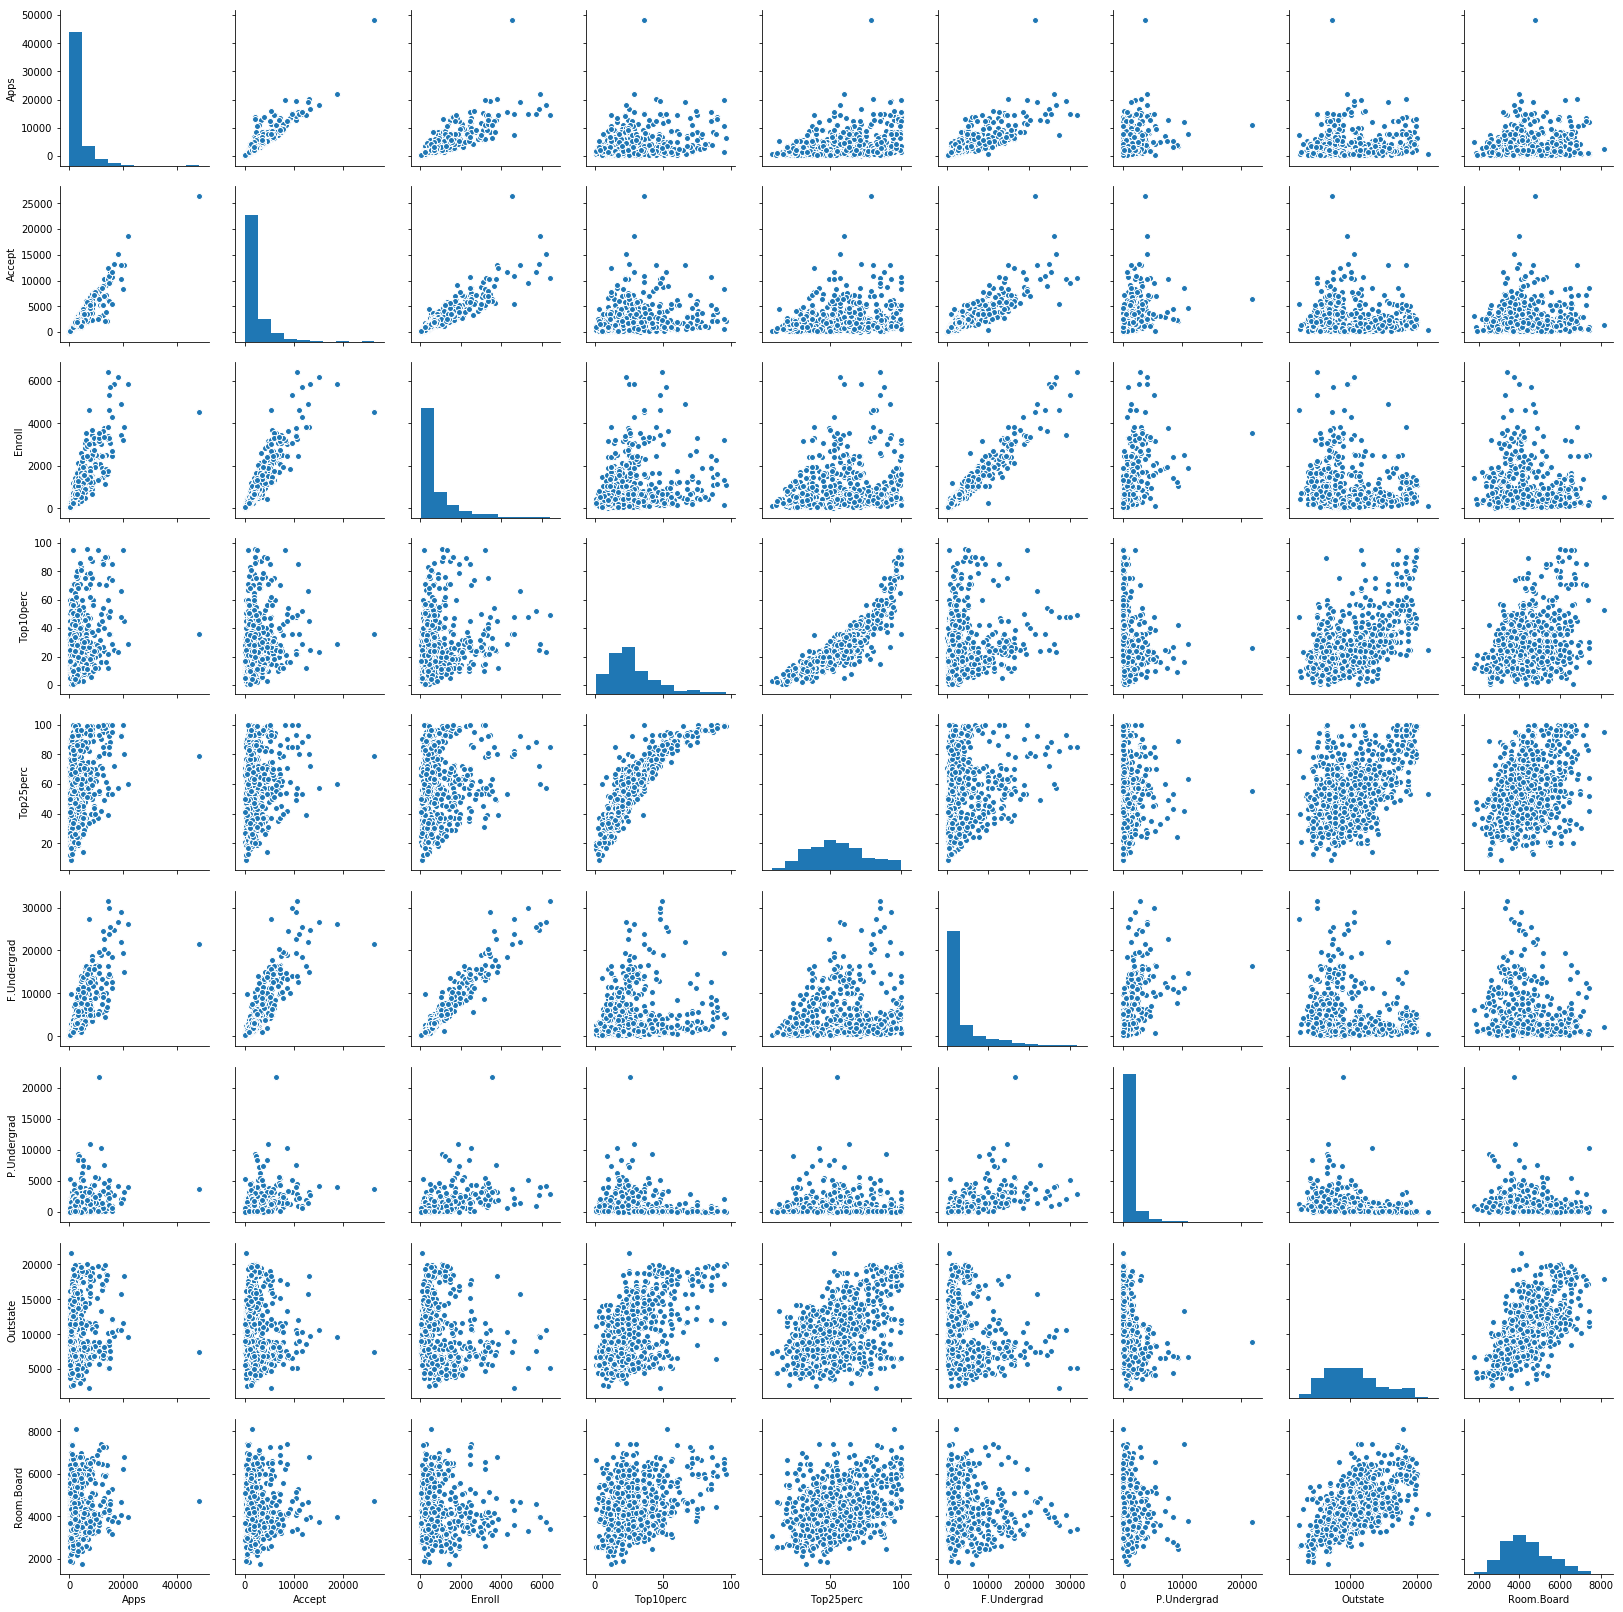

In [14]:
import seaborn as sns
sns.pairplot(college.iloc[:, :10]);

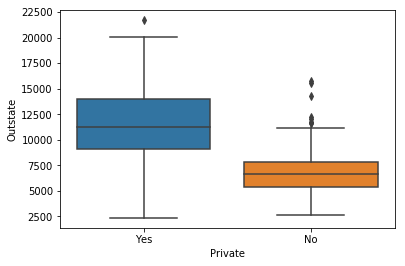

In [15]:
sns.boxplot('Private', 'Outstate', data=college);

In [16]:
college['Elite'] = np.where(college['Top10perc'] > 50, True, False)

In [17]:
college.Elite.sum()

78

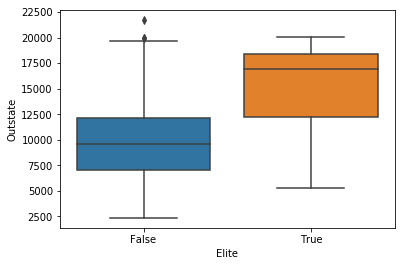

In [18]:
sns.boxplot('Elite', 'Outstate', data=college);

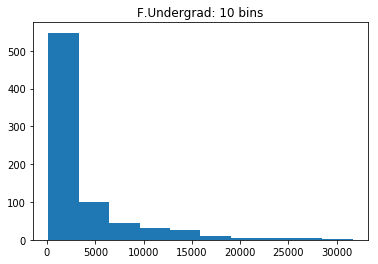

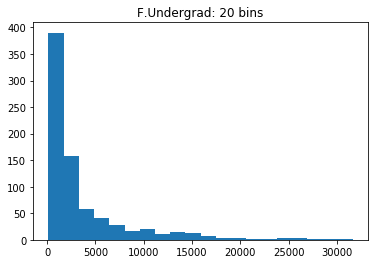

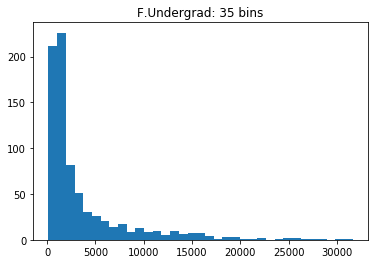

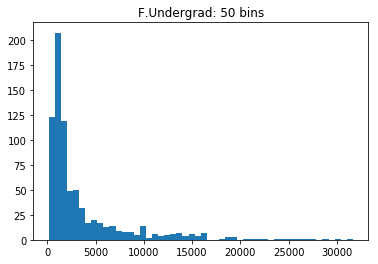

In [19]:
for bin_ in [10, 20, 35, 50]:
    plt.figure()
    plt.hist(college['F.Undergrad'], bins=bin_)
    plt.title('F.Undergrad: ' +str(bin_)+' bins')

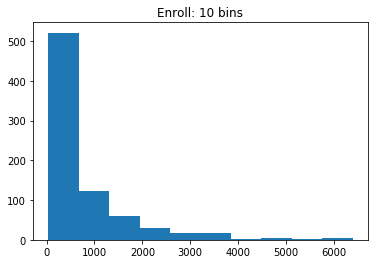

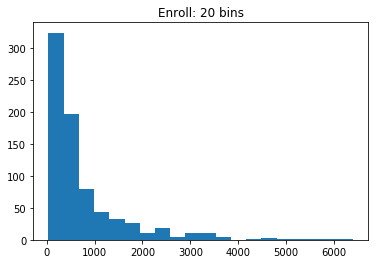

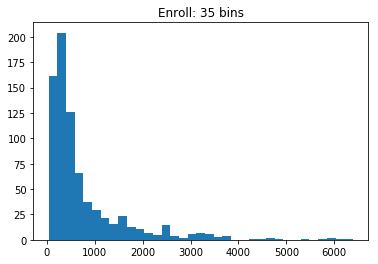

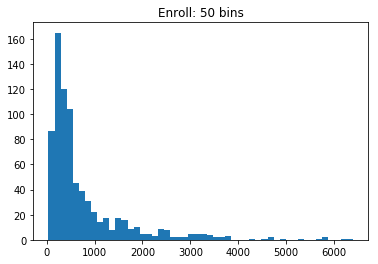

In [20]:
for bin_ in [10, 20, 35, 50]:
    plt.figure()
    plt.hist(college['Enroll'], bins=bin_)
    plt.title('Enroll: ' +str(bin_)+' bins')

Looking at the acceptance rate of colleges and how it relates to various variables should be interesting. First I am going to calculate each colleges acceptance rate, then see how it relates to tuition, the number of applications, and the rate at whichh students graduate.

In [21]:
college['Acceptance_Rate'] = college['Accept'] / college['Apps']

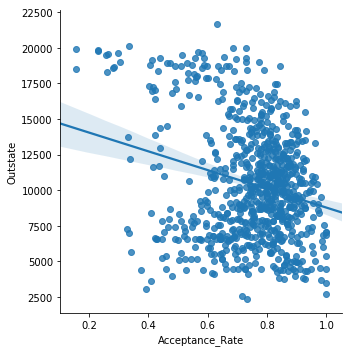

In [24]:
sns.lmplot('Acceptance_Rate', 'Outstate', data=college);

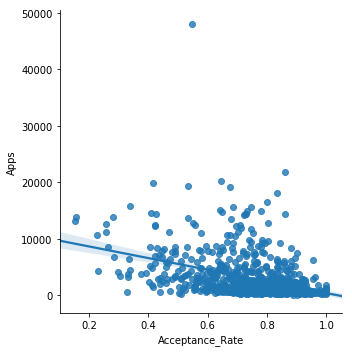

In [25]:
sns.lmplot('Acceptance_Rate', 'Apps', data=college);

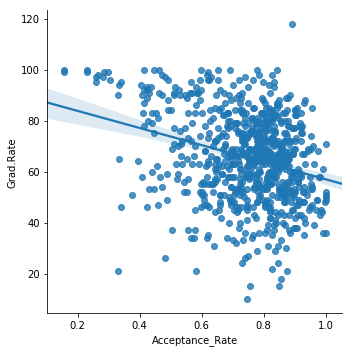

In [26]:
sns.lmplot('Acceptance_Rate', 'Grad.Rate', data=college);

There isn't much of a relationship between the acceptance rate and other variables. The graduation rate is higher for college's with lower acceptance rates, but not by a signifigant amount.

There also seems to be one errant data point where the graduation rate is above 100.

What if we look at a college's expenditure per student as compared to it's tuition and graduation rate. If you pay the college more, do they spend more on you? If they spend more on you, are you more likely to graduate?

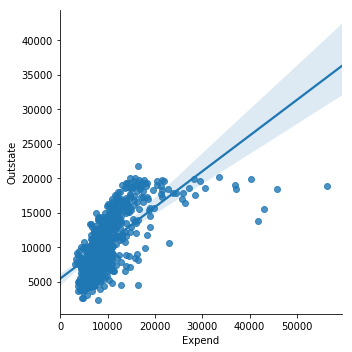

In [27]:
sns.lmplot('Expend', 'Outstate', data=college);

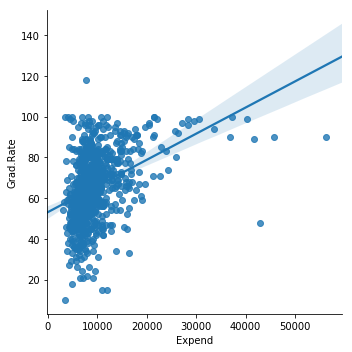

In [28]:
sns.lmplot('Expend', 'Grad.Rate', data=college);

Wow, some colleges are spending much more per student than they get in for tuition. 

#### 9. This exercise involves the Auto data set studied in the lab. Make sure that the missing values have been removed from the data.

**(a)** Which of the predictors are quantitative, and which are qualitative?

> The columns mpg, cylinders, displacement, horsepower, weight, and acceleration are quantitative, while year, origin, and name are qualitative.

**(b)** What is the range of each quantitative predictor? You can answer this using the range() function.

> See below

**(c)** What is the mean and standard deviation of each quantitative predictor?

> See below

**(d)** Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

> See below

**(e)** Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.

> See below

**(f)** Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

> Horsepower and weight seem to have the strongest relationship with mpg in the pair plot below. When we check the correlation table it looks like weight is most correlated followed by displacement, horsepower and cylinders. All of these are at 0.77 or above.

In [30]:
auto = pd.read_csv('data/auto.csv')

In [32]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [34]:
#b range of each quantitative column
quant = ['mpg', 'cylinders', 'displacement', 
         'horsepower', 'weight', 'acceleration']
auto[quant].max() - auto[quant].min()

mpg               37.6
cylinders          5.0
displacement     387.0
horsepower       184.0
weight          3527.0
acceleration      16.8
dtype: float64

In [35]:
#c mean
auto[quant].mean()

mpg               23.445918
cylinders          5.471939
displacement     194.411990
horsepower       104.469388
weight          2977.584184
acceleration      15.541327
dtype: float64

In [36]:
#c standard deviation
auto[quant].std()

mpg               7.805007
cylinders         1.705783
displacement    104.644004
horsepower       38.491160
weight          849.402560
acceleration      2.758864
dtype: float64

Could have used describe to answer those questions, but this seems easier to read. I am going to use describe for the mean and standard deviation of the subset from question **d**.

In [37]:
auto_subset = pd.concat((auto.iloc[:10], auto.iloc[85:]))

In [38]:
auto_subset[quant].max() - auto_subset[quant].min()

mpg               35.6
cylinders          5.0
displacement     387.0
horsepower       184.0
weight          3348.0
acceleration      16.3
dtype: float64

In [39]:
auto_subset[quant].describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,24.374763,5.381703,187.880126,101.003155,2938.854890,15.704101
std,7.872565,1.658135,100.169973,36.003208,811.640668,2.719913
min,11.000000,3.000000,68.000000,46.000000,1649.000000,8.500000
25%,18.000000,4.000000,101.000000,75.000000,2215.000000,14.000000
50%,23.900000,4.000000,146.000000,90.000000,2795.000000,15.500000
75%,30.500000,6.000000,250.000000,115.000000,3520.000000,17.300000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000


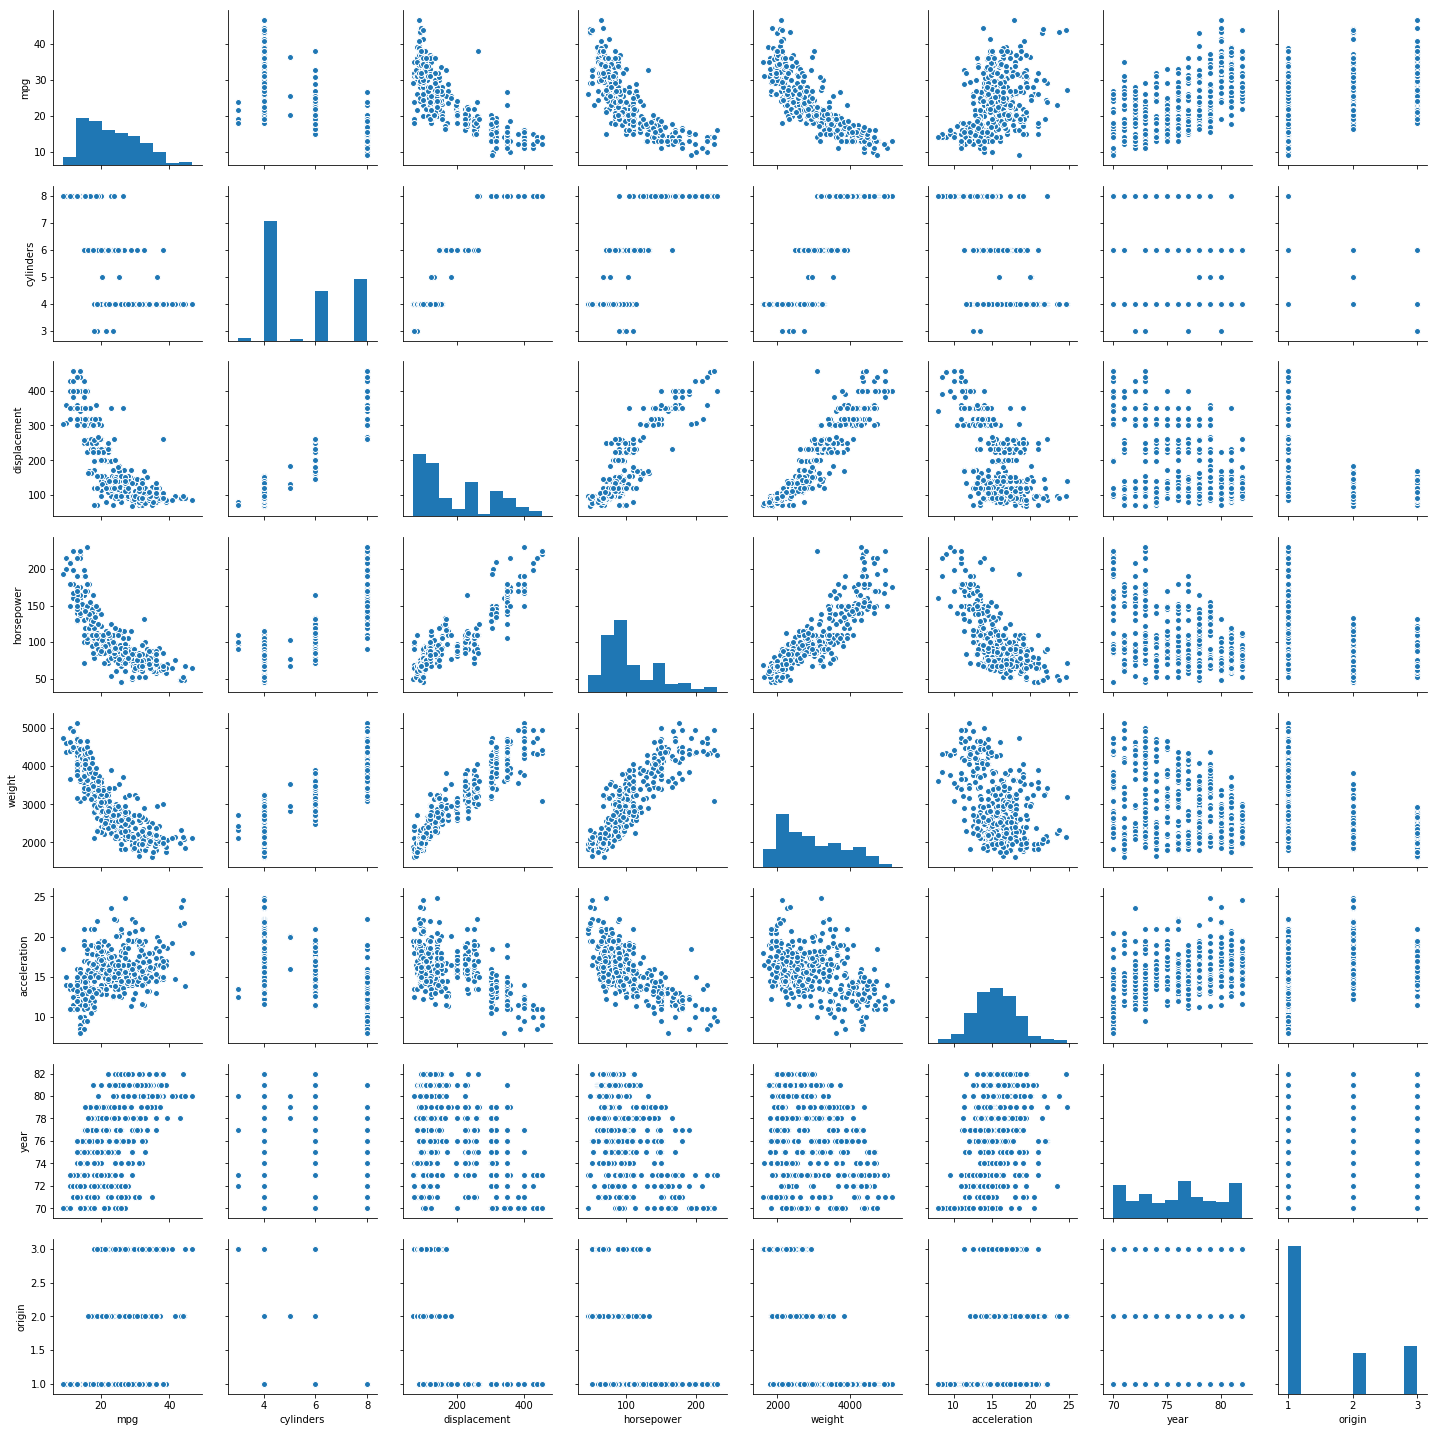

In [40]:
sns.pairplot(auto);

As you might expect, mpg decrease as we increase the horsepower or weight. When we increase the weight, we actually increare the horsepower most time as well. It also looks like acceleration decreases as the horsepower increase, which is a little surprising.

In [41]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


#### 10. This exercise involves the Boston housing data set.
**(a)** To begin, load in the Boston data set. How many rows are in this data set? How many columns? What do the rows and columns represent?

> There are 506 rows and 14 columns. Each row is a suburb or neighborhood of Boston, the columns are as follows;

+ CRIM - per capita crime rate by town
+ ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
+ INDUS - proportion of non-retail business acres per town.
+ CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
+ NOX - nitric oxides concentration (parts per 10 million)
+ RM - average number of rooms per dwelling
+ AGE - proportion of owner-occupied units built prior to 1940
+ DIS - weighted distances to five Boston employment centres
+ RAD - index of accessibility to radial highways
+ TAX - full-value property-tax rate per 10,000 dollars
+ PTRATIO - pupil-teacher ratio by town
+ B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
+ LSTAT - % lower status of the population
+ MEDV - Median value of owner-occupied homes in 1000's of dollars

**(b)** Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.

> Looking at the pairwise scatterplots there do not seem to be strong relationships between the variables. The strongest looking trend is between the lower status of the population and the median value of a home, which should probably be expected.

**(c)** Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

> The accessibility to radial highways and the tax value are the only varaibles with a correlation score above 0.50.

**(d)** Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

> See highlighted plot below. We see 396.9 for black and 24 for RAD more often than I think we would expect. There may be some limitations to the data. After the highlight plot I included a series of the variables ranges.

**(e)** How many of the suburbs in this data set bound the Charles river?

> 35

**(f)** What is the median pupil-teacher ratio among the towns in this data set?

> 19.05

**(g)** Which suburb of Boston has lowest median value of owner occupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your  findings.

> 398 is the suburb with the lowest, the crime is somewhere in the middle of the range, but crime has some wacky outliers. The tax value is a little higher than expected while the pupil-teacher ration is slightly above the median. 

**(h)** In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.

> 64 suburbs average more than 7 rooms per dwelling, only 13 average more than 8. The crime and median value of homes are about twice that for the nieghborhoods with 8 rooms on average. 

In [42]:
boston = pd.read_csv('data/boston.csv')

In [44]:
boston.shape

(506, 14)

In [45]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


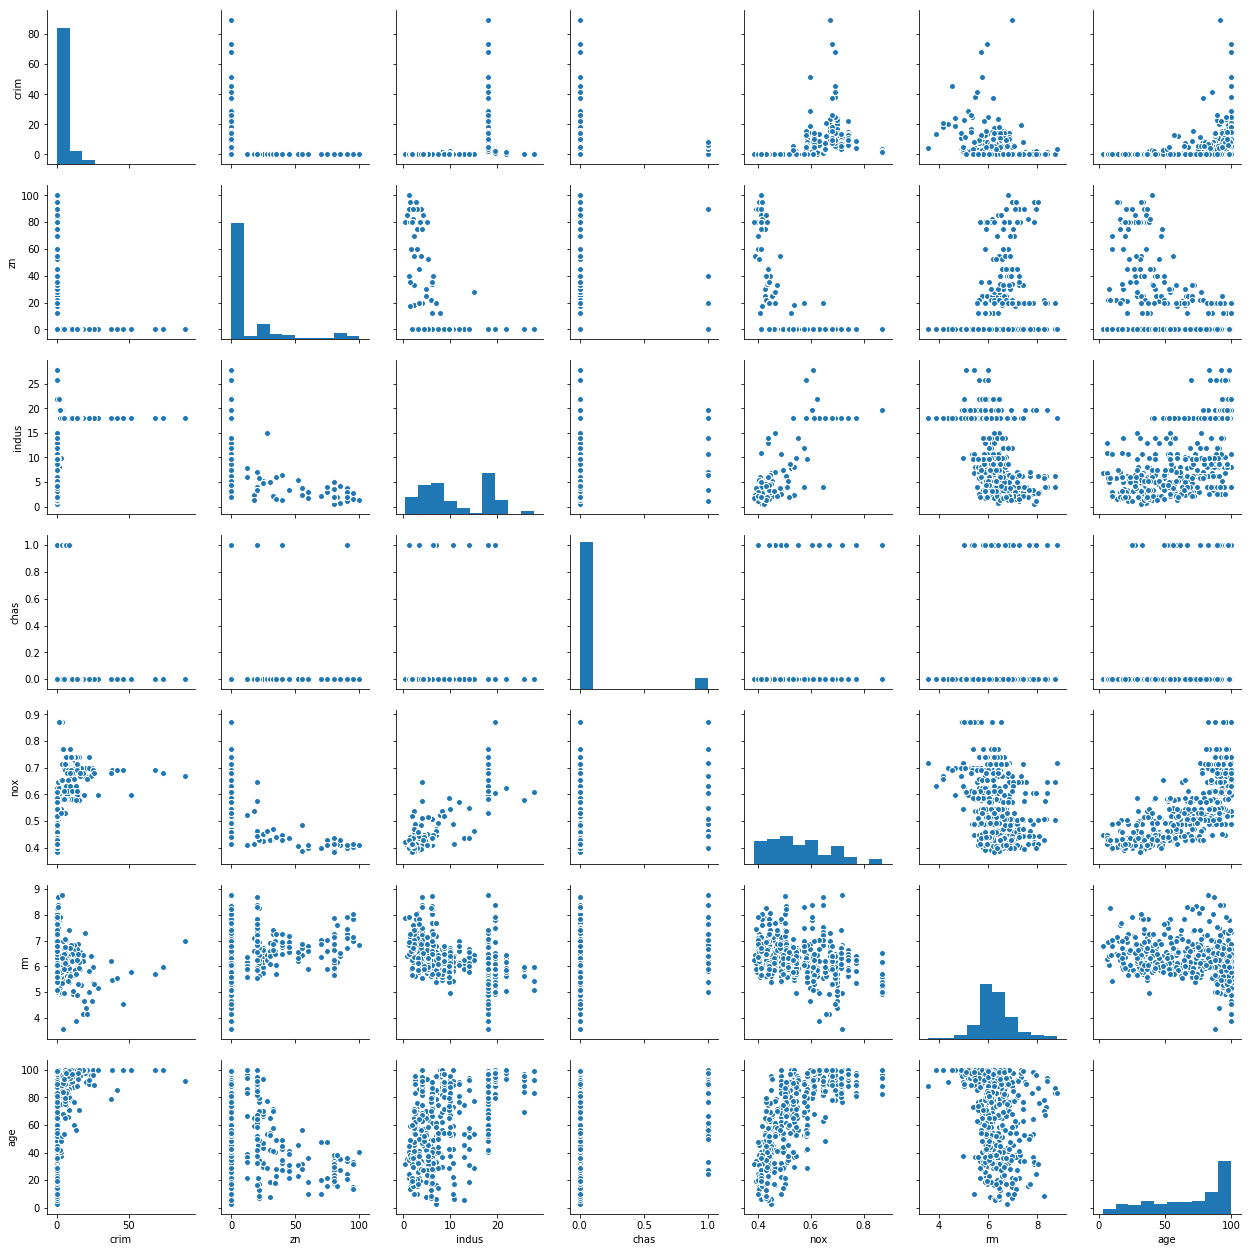

In [47]:
sns.pairplot(boston[boston.columns[:7]]);

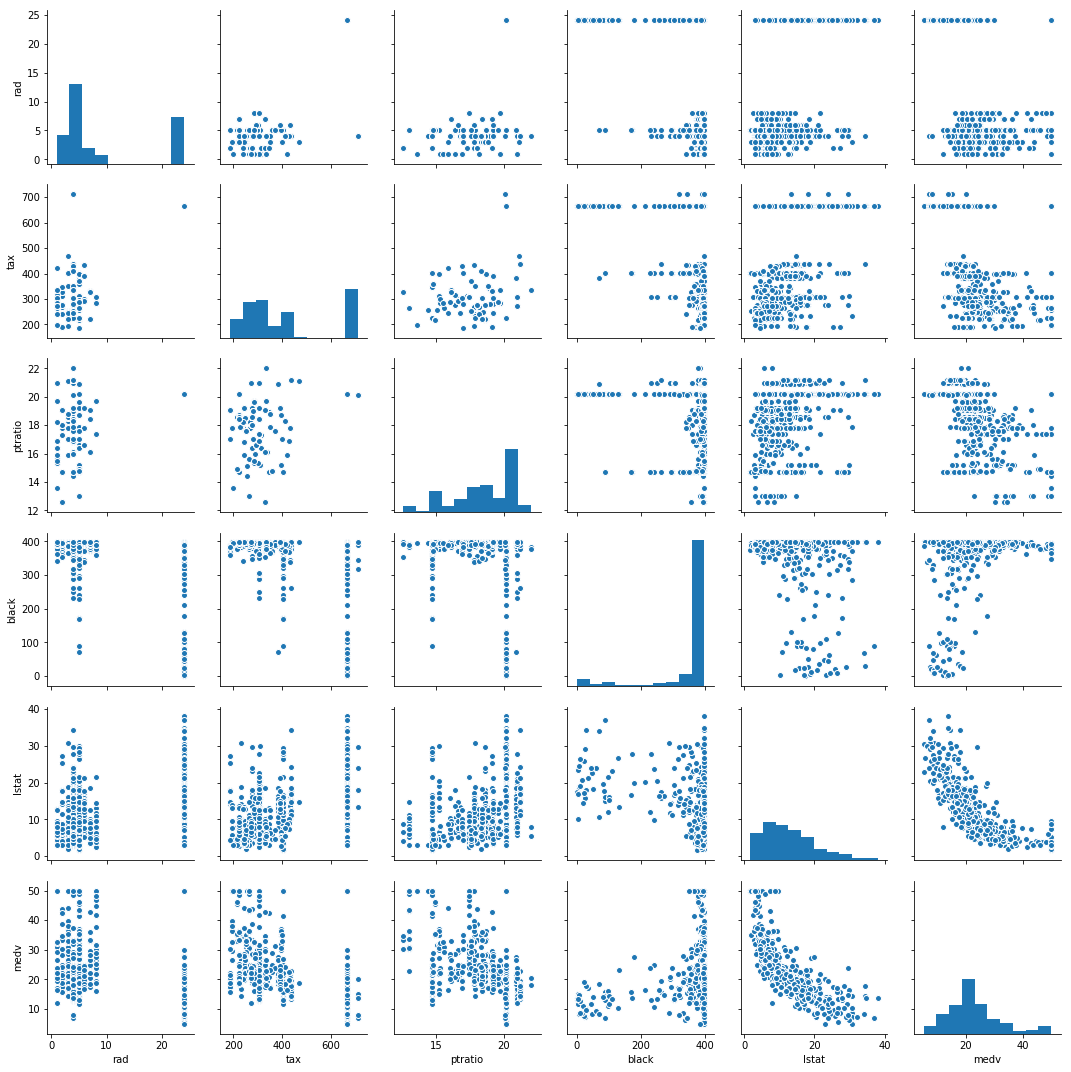

In [48]:
sns.pairplot(boston[boston.columns[8:]]);

In [49]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [50]:
boston.loc[boston.idxmax().unique()].style.highlight_max()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
380,88.9762,0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.9,17.21,10.4
57,0.01432,100,1.32,0,0.411,6.816,40.5,8.3248,5,256,15.1,392.9,3.95,31.6
488,0.15086,0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,395.09,18.06,15.2
142,3.32105,0,19.58,1,0.871,5.403,100,1.3216,5,403,14.7,396.9,26.82,13.4
364,3.47428,0,18.1,1,0.718,8.78,82.9,1.9047,24,666,20.2,354.55,5.29,21.9
8,0.21124,12.5,7.87,0,0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5
353,0.01709,90,2.02,0,0.41,6.728,36.1,12.1265,5,187,17,384.46,4.5,30.1
356,8.98296,0,18.1,1,0.77,6.212,97.4,2.1222,24,666,20.2,377.73,17.6,17.8
354,0.04301,80,1.91,0,0.413,5.663,21.9,10.5857,4,334,22,382.8,8.05,18.2
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24


In [51]:
boston.max() - boston.min()

crim        88.96988
zn         100.00000
indus       27.28000
chas         1.00000
nox          0.48600
rm           5.21900
age         97.10000
dis         10.99690
rad         23.00000
tax        524.00000
ptratio      9.40000
black      396.58000
lstat       36.24000
medv        45.00000
dtype: float64

In [53]:
boston['chas'].sum()

35

In [54]:
boston['ptratio'].median()

19.05

In [55]:
boston.loc[boston['medv'].idxmin()]

crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
black      396.9000
lstat       30.5900
medv         5.0000
Name: 398, dtype: float64

In [58]:
boston[boston['rm'] > 8].shape

(13, 14)

In [61]:
boston[boston['rm'] > 7].shape

(64, 14)

In [57]:
pd.DataFrame({'More than 8 rooms': boston[boston['rm'] > 8].describe().loc['50%'], 
              '8 or less rooms' : boston[boston['rm'] <= 8].describe().loc['50%']})

,8 or less rooms,More than 8 rooms
crim,0.24522,0.52014
zn,0.00000,0.00000
indus,9.69000,6.20000
chas,0.00000,0.00000
nox,0.53800,0.50700
rm,6.18500,8.29700
age,77.30000,78.30000
dis,3.21570,2.89440
rad,5.00000,7.00000
tax,334.00000,307.00000
